### Importing the required libraries

In [2]:
import pandas as pd
import glob
import os
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt



### Merging 12 month of Data

In [3]:
path = '/Users/bzabert/Documents/Portfolio/Python/Sales Analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
data_list = []
for filename in glob.glob(os.path.join(path, '*.csv')):
    with open(os.path.join(os.getcwd(), filename), 'r') as f: # open in readonly mode
        data_list.append(pd.read_csv(f))
df= pd.concat(data_list)

df.to_csv('/Users/bzabert/Documents/Portfolio/Python/Sales Analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/sales_2019.csv',index=False)
df        


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### Data cleaning

In [4]:
df= df.dropna(subset= ['Quantity Ordered'],inplace=False)

In [5]:
df= df.drop(df[df['Order ID']== 'Order ID'].index, )
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [6]:
df['Month']= df['Order Date'].str.slice(0,2)
df['Month'] = df['Month'].astype('int32') 
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


### Task 1: Which month of the year the Revenue was the highest?

In [7]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')
Sales_by_month=df.groupby('Month' ).sum()
Sales_by_month.sort_values(by=['Quantity Ordered'], ascending= False)

,Quantity Ordered
Month,
12,27764
10,22356
4,20226
11,19479
5,18344
3,16697
7,15781
6,14964
8,13185


In [8]:
df['Price Each']=df['Price Each'].astype('float')
df['Revenue']= df['Quantity Ordered']*df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


In [9]:
df['Revenue']=df['Revenue'].astype('float')
Revenue_by_month=df.groupby(['Month'],sort=True)['Revenue'].sum()
Revenue_by_month

Month
1     1786511.29
2     2158127.48
3     2755969.40
4     3336376.42
5     3101881.04
6     2524464.99
7     2587444.91
8     2191698.31
9     2050361.26
10    3679254.16
11    3149785.09
12    4557905.42
Name: Revenue, dtype: float64

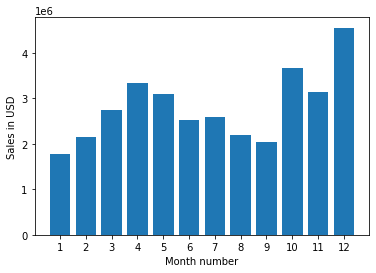

In [10]:
months= range(1,13)

plt.bar(months, Revenue_by_month)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()


### Task 2: Which city has most amount of Orders? 

In [11]:
df[['Street', 'City','Postal Code']] = df['Purchase Address'].str.split(',', expand=True)
df['City_St']= df['City'] + ', '+ df['Postal Code'].str[1:3]
df.drop(columns= ['Street','City','Postal Code'], inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City_St
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"
...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,"Boston, MA"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,"New York City, NY"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,"San Francisco, CA"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,"San Francisco, CA"


In [32]:
Sales_by_city = df.groupby(['City_St']).sum()
Sales_by_city 

,Quantity Ordered,Price Each,Month,Revenue
City_St,,,,
"Atlanta, GA",16304,2726247.35,103160,2741642.05
"Austin, TX",10933,1777231.68,68570,1786745.52
"Boston, MA",22123,3580075.00,138632,3604080.86
"Dallas, TX",16453,2702619.12,102976,2717793.72
"Los Angeles, CA",32722,5323915.79,204933,5354039.93
"New York City, NY",27470,4553287.23,172980,4581658.91
"Portland, ME",2696,441701.73,16889,444110.53
"Portland, OR",11110,1822878.38,69540,1832538.71
"San Francisco, CA",49363,8074045.54,310174,8124120.94


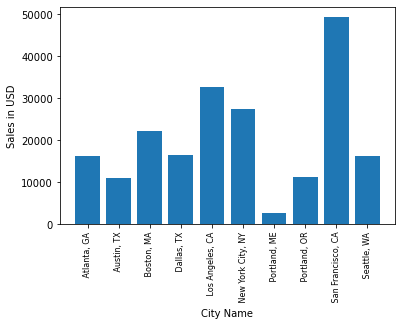

In [33]:
cities= [city for city, DF in df.groupby('City_St')]

plt.bar( cities ,Sales_by_city['Quantity Ordered'] )
plt.xticks(cities, rotation= 'vertical' , size= 8)
plt.ylabel('Sales in USD')
plt.xlabel('City Name')
plt.show()

### Task 3: What time we should we display adevertisment to maximize the likelihood of a customer buying a product?

In [55]:
df['Order_time']=df['Order Date']
df['Order_time']=pd.to_datetime(df['Order_time']).dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City_St,Order_time
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12
...,...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,"Boston, MA",19
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,"New York City, NY",19
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,"San Francisco, CA",18
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,"San Francisco, CA",18


In [58]:
sales_by_hour=df.groupby('Order_time').sum()
sales_by_hour

,Quantity Ordered,Price Each,Month,Revenue
Order_time,,,,
0,4355,694313.78,27103,698694.76
1,2579,445316.87,16408,447663.86
2,1379,233191.25,8371,234191.08
3,912,141948.06,5816,142976.54
4,925,160759.69,6081,161350.57
5,1463,223261.09,9127,224313.72
6,2767,438446.96,17295,441523.14
7,4483,730350.33,28389,734595.75
8,6917,1175057.60,43181,1181363.76


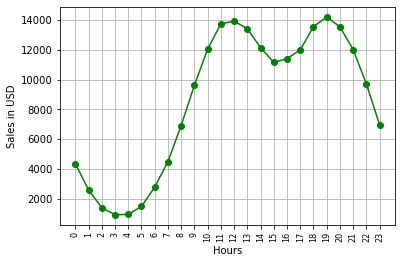

In [64]:
hour= [hour for hour, DF in df.groupby('Order_time')]

plt.plot( hour ,sales_by_hour['Quantity Ordered'], color= 'green',marker='o' )
plt.xticks(hour, rotation= 'vertical' , size= 8)
plt.ylabel('Sales in USD')
plt.xlabel('Hours')
plt.grid()
plt.show()


### Task 4: What products are most often sold together? 

In [128]:
df_duplicated = df[df.duplicated(subset= 'Order ID', keep = False)]
df_duplicated['Grouped'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_duplicated = df_duplicated[df_duplicated.duplicated(subset= 'Grouped', keep = False)]
df_duplicated.drop(columns= ['Product','Price Each','Order Date','Purchase Address','Order_time','Month','Revenue','City_St','Two or more'], inplace= True)
df_duplicated

/var/folders/y1/4wdz34ys4259cg7jf0wpgfsr0000gn/T/ipykernel_3395/395288486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicated['Grouped'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Quantity Ordered,Grouped
16,295681,1,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,1,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,1,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,1,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,1,"Vareebadd Phone,USB-C Charging Cable"
...,...,...,...
13592,222882,1,"Apple Airpods Headphones,AA Batteries (4-pack)"
13594,222884,1,"Google Phone,USB-C Charging Cable"
13595,222884,1,"Google Phone,USB-C Charging Cable"
13614,222903,1,"iPhone,Lightning Charging Cable"


In [134]:
count = Counter()

for row in df_duplicated['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 2066),
 (('Google Phone', 'USB-C Charging Cable'), 2042),
 (('iPhone', 'Wired Headphones'), 963),
 (('Google Phone', 'Wired Headphones'), 916),
 (('iPhone', 'Apple Airpods Headphones'), 760),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 745),
 (('Google Phone', 'Bose SoundSport Headphones'), 500),
 (('USB-C Charging Cable', 'Wired Headphones'), 436),
 (('Vareebadd Phone', 'Wired Headphones'), 321),
 (('Lightning Charging Cable', 'Wired Headphones'), 250)]

### Task 5: What product sold the most? 

In [144]:
df_product=df.groupby('Product').sum()
df_product['Quantity Ordered'].sort_values(ascending = False)

Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int32

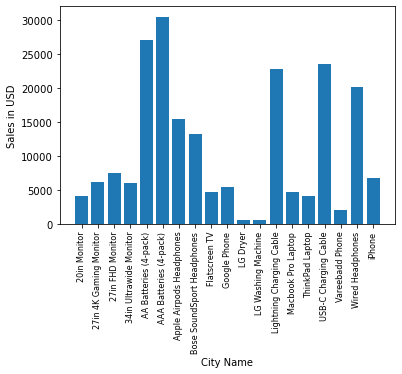

In [145]:
product= [product for product, DF in df.groupby('Product')]

plt.bar( product ,df_product['Quantity Ordered'] )
plt.xticks(product, rotation= 'vertical' , size= 8)
plt.ylabel('Sales in USD')
plt.xlabel('City Name')
plt.show()

/var/folders/y1/4wdz34ys4259cg7jf0wpgfsr0000gn/T/ipykernel_3395/2950440475.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation = 'vertical', size=8)


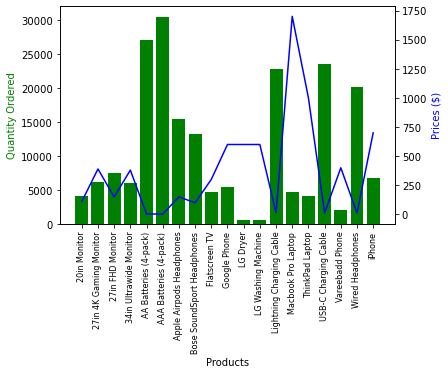

In [163]:
prices= df.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, df_product['Quantity Ordered'] , color='g')
ax2.plot(product, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')
ax1.set_xticklabels(product, rotation = 'vertical', size=8)

plt.show()